# **4.04 数字の画像（sklearn）の学習**

# 【データの準備と確認】

リスト4-24：（リストA）

In [1]:
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 72.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=e1f80a83f48f1196ad436c28c0a046d44fc1649983357cf4037096c62f5f7f1f
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


リスト4-25

In [2]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
digits = sklearn.datasets.load_digits()
X = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"学習データ（問題画像）　：{x_train.shape}")
print(f"テストデータ（問題画像）：{x_test.shape}")

学習データ（問題画像）　：(1347, 64)
テストデータ（問題画像）：(450, 64)


リスト4-26

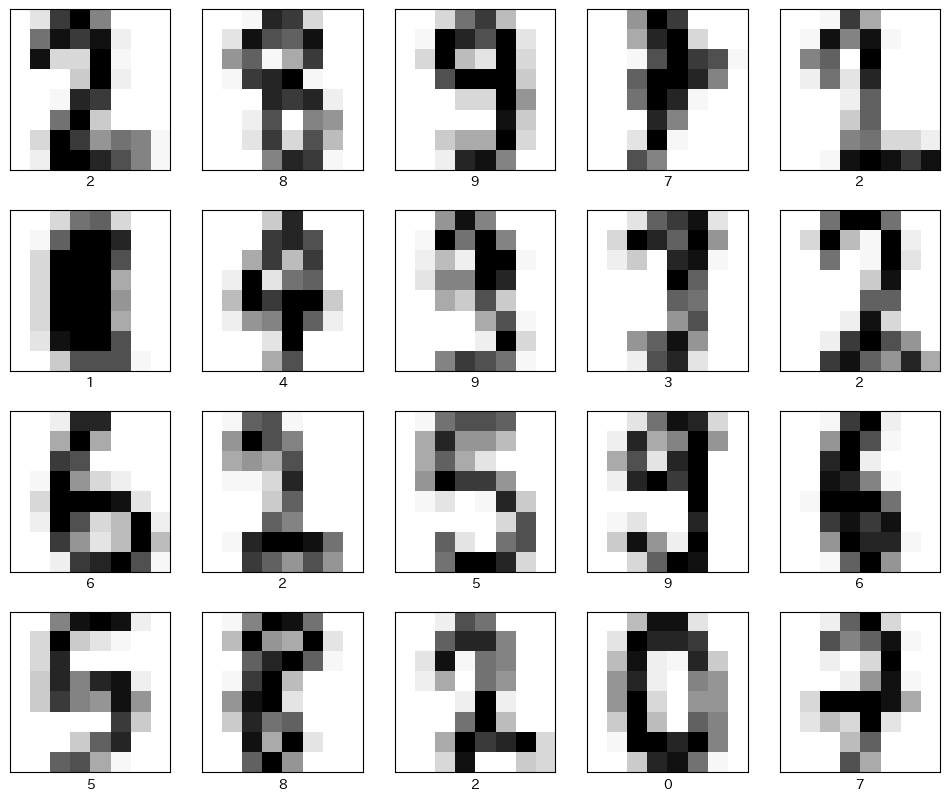

In [3]:
def disp_data(xdata, ydata):
    plt.figure(figsize=(12,10))
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(xdata[i].reshape(8,8), cmap="Greys")
        plt.xlabel(ydata[i])
    plt.show()

disp_data(x_train, y_train)

リスト4-27

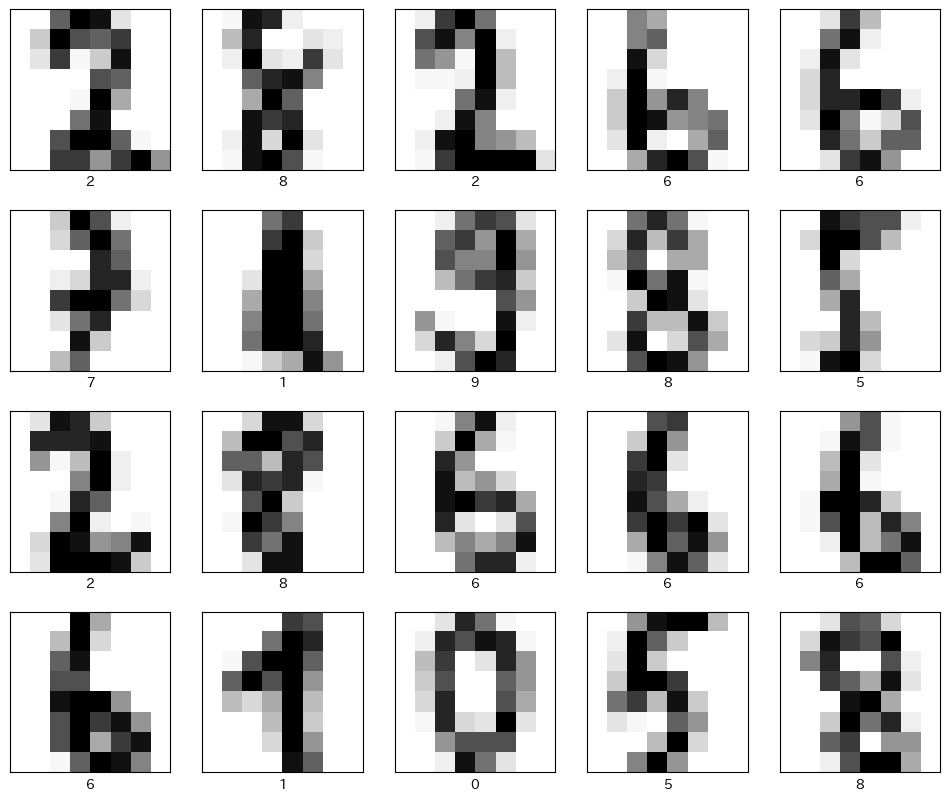

In [4]:
disp_data(x_test, y_test)

# 【モデルを作って学習】

リスト4-28

In [5]:
model = keras.models.Sequential()
model.add(layers.Dense(128, activation="relu", input_dim=64))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 9,610
Trainable params: 9,610
Non-trainable params: 0
_________________________________________________________________


リスト4-29：（リストB'）

In [6]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10, #10
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/10
43/43 [==============================] - 1s 12ms/step - loss: 2.2777 - accuracy: 0.2376 - val_loss: 2.2468 - val_accuracy: 0.5889
Epoch 2/10
43/43 [==============================] - 0s 5ms/step - loss: 2.2076 - accuracy: 0.6630 - val_loss: 2.1655 - val_accuracy: 0.6400
Epoch 3/10
43/43 [==============================] - 0s 6ms/step - loss: 2.1062 - accuracy: 0.7223 - val_loss: 2.0488 - val_accuracy: 0.7111
Epoch 4/10
43/43 [==============================] - 0s 5ms/step - loss: 1.9698 - accuracy: 0.7498 - val_loss: 1.9023 - val_accuracy: 0.7111
Epoch 5/10
43/43 [==============================] - 0s 6ms/step - loss: 1.8035 - accuracy: 0.8048 - val_loss: 1.7335 - val_accuracy: 0.7600
Epoch 6/10
43/43 [==============================] - 0s 7ms/step - loss: 1.6202 - accuracy: 0.7877 - val_loss: 1.5545 - val_accuracy: 0.7889
Epoch 7/10
43/43 [==============================] - 0s 7ms/step - loss: 1.4383 - accuracy: 0.8144 - val_loss: 1.3814 - val_accuracy: 0.8089
Epoch 8/10
43/43 [=

リスト4-30：（リストC）

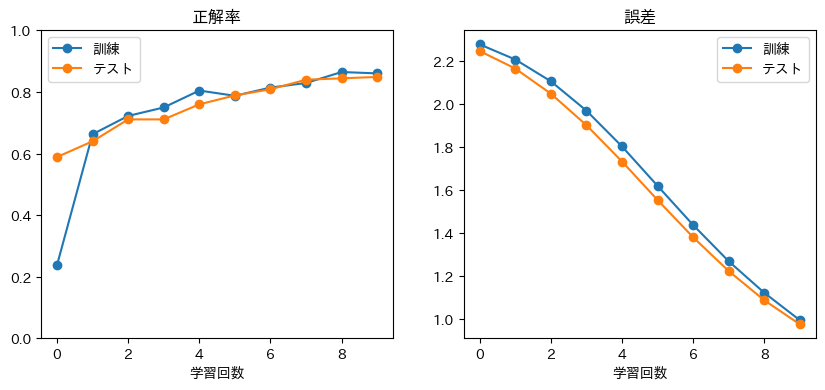

In [7]:
param = [["正解率", "accuracy", "val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"], loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

## 正解率をもう少し上げるために、ニューロン数と学習回数を増やしてみましょう。

リスト4-31

In [8]:
model = keras.models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_dim=64))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              66560     
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                                 
Total params: 1,126,410
Trainable params: 1,126,410
Non-trainable params: 0
_________________________________________________________________


リスト4-32：（リストB’）

In [9]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10, #10
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/10
43/43 [==============================] - 2s 31ms/step - loss: 1.8052 - accuracy: 0.5486 - val_loss: 1.0413 - val_accuracy: 0.7222
Epoch 2/10
43/43 [==============================] - 1s 23ms/step - loss: 0.6363 - accuracy: 0.8344 - val_loss: 0.4155 - val_accuracy: 0.9000
Epoch 3/10
43/43 [==============================] - 1s 24ms/step - loss: 0.3376 - accuracy: 0.9094 - val_loss: 0.2680 - val_accuracy: 0.9311
Epoch 4/10
43/43 [==============================] - 1s 25ms/step - loss: 0.2759 - accuracy: 0.9213 - val_loss: 0.2367 - val_accuracy: 0.9333
Epoch 5/10
43/43 [==============================] - 1s 25ms/step - loss: 0.1806 - accuracy: 0.9465 - val_loss: 0.1788 - val_accuracy: 0.9533
Epoch 6/10
43/43 [==============================] - 1s 27ms/step - loss: 0.1618 - accuracy: 0.9465 - val_loss: 0.1958 - val_accuracy: 0.9378
Epoch 7/10
43/43 [==============================] - 2s 37ms/step - loss: 0.1548 - accuracy: 0.9555 - val_loss: 0.1668 - val_accuracy: 0.9533
Epoch 8/10
43

リスト4-33：（リストC）

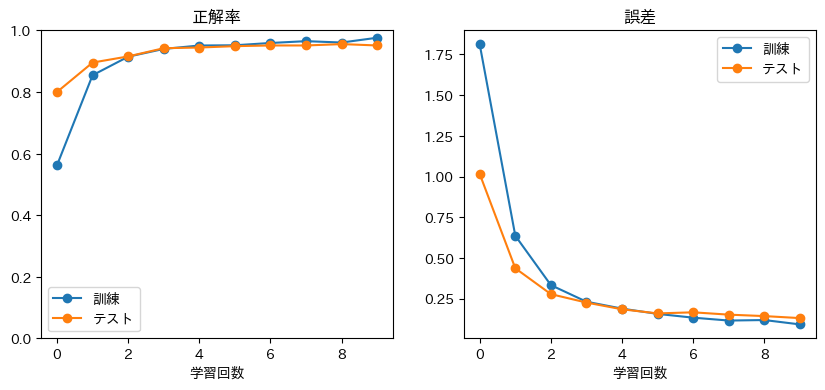

In [ ]:
param = [["正解率", "accuracy", "val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"], loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

# 【データを渡して予測】

リスト4-34

15/15 [==============================] - 0s 5ms/step


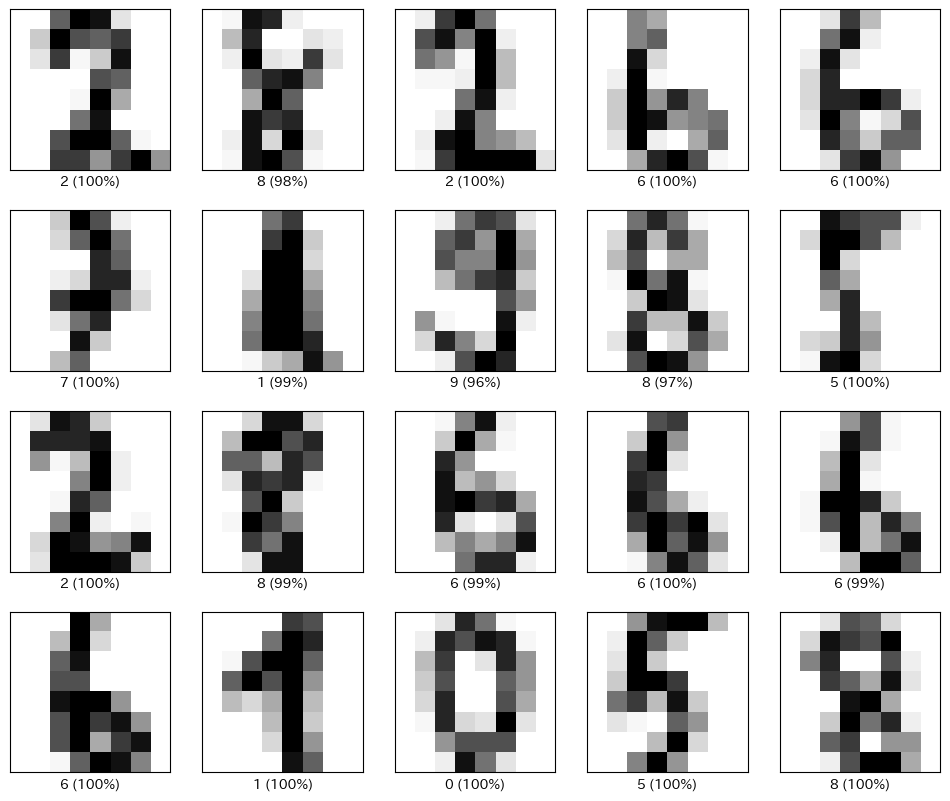

In [ ]:
pre = model.predict(x_test)

plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape(8,8), cmap="Greys")

    index = np.argmax(pre[i])
    pct = pre[i][index]
    ans = ""
    if index != y_test[i]:
        ans = "x--o["+str(y_test[i])+"]"
    lbl = f"{index} ({pct:.0%}){ans}"
    plt.xlabel(lbl)
plt.show()